In [1]:
require 'nn'
-- require 'cunn'

net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 7, 7)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 6, 6))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*4*4))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*4*4, 64))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(64, 10))

criterion = nn.CrossEntropyCriterion()


In [2]:
-- load trainin images
byte_x = torch.load('cifar10/tr_data.bin'):double()
-- load trainin labels 
tr_y = torch.load('cifar10/tr_labels.bin'):double()+1

byte_x_flip = torch.DoubleTensor(50000,3,32,32)
for i=1,byte_x:size(1) do
    image.hflip(byte_x_flip[i], byte_x[i])
end

x1_mean = torch.mean(byte_x, 1)
x1_std = torch.std(byte_x, 1)

x2_mean = torch.mean(byte_x_flip, 1)
x2_std = torch.std(byte_x_flip, 1)



In [3]:
function get_xi(data_x, idx, batchSize, ind)
    local xi = data_x:narrow(1, idx, batchSize)
    if(mod(ind,2)==0) then
        xi = (xi - torch.expand(x2_mean,batchSize,3,32,32)):cdiv(torch.expand(x2_std,batchSize,3,32,32))
    else
        xi = (xi - torch.expand(x1_mean,batchSize,3,32,32)):cdiv(torch.expand(x1_std,batchSize,3,32,32))
    end
    return xi
end

function mod(a, b)
    return a - math.floor(a/b)*b
end

In [4]:

function train(label, lr, net, criterion, maxiter)

  index = 1
  --err = torch.Tensor(maxiter)
  err = 0
  print('Starting training...')
  while true do
    collectgarbage()
    errort = 0
    myError = 0
    if mod(index,4) == 0 then
      lr = lr / index
    end
    
    if(mod(index,2)==0) then
      dataset1 = byte_x_flip
    else
      dataset1 = byte_x
    end
        
    for iteration = 1,dataset1:size(1)-99,100 do
      input = get_xi(dataset1, iteration, 100, index)
      output = label:narrow(1, iteration, 100)
      --predict
      prediction = net:forward(input)
      errort = errort + criterion:forward(prediction, output)
      --zero accumulated gradients
      net:zeroGradParameters()
      --accumulate gradient (backpropagate)
      cri_grad = criterion:backward(prediction, output)
      net:backward(input, cri_grad)
      --update parameters with a learning rate
      net:updateParameters(lr)
      if mod(iteration,1000) == 1 then
        _, prediction_label = torch.max(prediction, 2)
        myError = torch.sum(torch.ne(output, prediction_label:reshape(100):double()))
        print('iteration: ' .. iteration .. ' accuracy: ' .. 100 - myError .. '%')
      end
      collectgarbage()
    end

    err = errort / dataset1:size(1)
    print('epoch: ' .. index .. ' error: ' .. err*100)
    if index == maxiter then
      print('max Iterations reached. Training error: ' .. err*100)
      --gnuplot.plot(err)
      --gnuplot.axis{'','',0,''}
      return net
    end
    index = index + 1
  end
end

In [5]:
collectgarbage()





0	


In [6]:
train(tr_y, 0.1, net, criterion, 10)

Starting training...	


iteration: 1 accuracy: 14%	


iteration: 1001 accuracy: 11%	


iteration: 2001 accuracy: 16%	


iteration: 3001 accuracy: 17%	


iteration: 4001 accuracy: 26%	


iteration: 5001 accuracy: 31%	


iteration: 6001 accuracy: 21%	


iteration: 7001 accuracy: 32%	


iteration: 8001 accuracy: 30%	


iteration: 9001 accuracy: 29%	


iteration: 10001 accuracy: 35%	


iteration: 11001 accuracy: 24%	


iteration: 12001 accuracy: 27%	


iteration: 13001 accuracy: 31%	


iteration: 14001 accuracy: 28%	


iteration: 15001 accuracy: 26%	


iteration: 16001 accuracy: 36%	


iteration: 17001 accuracy: 42%	


iteration: 18001 accuracy: 30%	


iteration: 19001 accuracy: 40%	


iteration: 20001 accuracy: 35%	


iteration: 21001 accuracy: 37%	


iteration: 22001 accuracy: 32%	


iteration: 23001 accuracy: 36%	


iteration: 24001 accuracy: 35%	


iteration: 25001 accuracy: 41%	


iteration: 26001 accuracy: 42%	


iteration: 27001 accuracy: 38%	


iteration: 28001 accuracy: 25%	


iteration: 29001 accuracy: 34%	


iteration: 30001 accuracy: 38%	


iteration: 31001 accuracy: 40%	


iteration: 32001 accuracy: 34%	


iteration: 33001 accuracy: 32%	


iteration: 34001 accuracy: 39%	


iteration: 35001 accuracy: 43%	


iteration: 36001 accuracy: 35%	


iteration: 37001 accuracy: 48%	


iteration: 38001 accuracy: 36%	


iteration: 39001 accuracy: 51%	


iteration: 40001 accuracy: 38%	


iteration: 41001 accuracy: 41%	


iteration: 42001 accuracy: 35%	


iteration: 43001 accuracy: 44%	


iteration: 44001 accuracy: 45%	


iteration: 45001 accuracy: 54%	


iteration: 46001 accuracy: 40%	


iteration: 47001 accuracy: 33%	


iteration: 48001 accuracy: 38%	


iteration: 49001 accuracy: 44%	


epoch: 1 error: 1.7935691995	


iteration: 1 accuracy: 47%	


iteration: 1001 accuracy: 45%	


iteration: 2001 accuracy: 39%	


iteration: 3001 accuracy: 42%	


iteration: 4001 accuracy: 43%	


iteration: 5001 accuracy: 43%	


iteration: 6001 accuracy: 39%	


iteration: 7001 accuracy: 42%	


iteration: 8001 accuracy: 44%	


iteration: 9001 accuracy: 38%	


iteration: 10001 accuracy: 52%	


iteration: 11001 accuracy: 39%	


iteration: 12001 accuracy: 42%	


iteration: 13001 accuracy: 41%	


iteration: 14001 accuracy: 53%	


iteration: 15001 accuracy: 45%	


iteration: 16001 accuracy: 45%	


iteration: 17001 accuracy: 49%	


iteration: 18001 accuracy: 41%	


iteration: 19001 accuracy: 45%	


iteration: 20001 accuracy: 46%	


iteration: 21001 accuracy: 49%	


iteration: 22001 accuracy: 40%	


iteration: 23001 accuracy: 50%	


iteration: 24001 accuracy: 53%	


iteration: 25001 accuracy: 51%	


iteration: 26001 accuracy: 54%	


iteration: 27001 accuracy: 44%	


iteration: 28001 accuracy: 30%	


iteration: 29001 accuracy: 42%	


iteration: 30001 accuracy: 54%	


iteration: 31001 accuracy: 55%	


iteration: 32001 accuracy: 47%	


iteration: 33001 accuracy: 39%	


iteration: 34001 accuracy: 38%	


iteration: 35001 accuracy: 50%	


iteration: 36001 accuracy: 47%	

iteration: 37001 accuracy: 43%	


iteration: 38001 accuracy: 48%	


iteration: 39001 accuracy: 52%	


iteration: 40001 accuracy: 56%	


iteration: 41001 accuracy: 41%	


iteration: 42001 accuracy: 52%	


iteration: 43001 accuracy: 45%	


iteration: 44001 accuracy: 49%	


iteration: 45001 accuracy: 63%	


iteration: 46001 accuracy: 48%	


iteration: 47001 accuracy: 45%	


iteration: 48001 accuracy: 44%	


iteration: 49001 accuracy: 52%	


epoch: 2 error: 1.5045715782447	


iteration: 1 accuracy: 52%	


iteration: 1001 accuracy: 54%	


iteration: 2001 accuracy: 38%	


iteration: 3001 accuracy: 40%	


iteration: 4001 accuracy: 50%	


iteration: 5001 accuracy: 39%	


iteration: 6001 accuracy: 46%	


iteration: 7001 accuracy: 49%	


iteration: 8001 accuracy: 47%	


iteration: 9001 accuracy: 45%	


iteration: 10001 accuracy: 56%	


iteration: 11001 accuracy: 46%	


iteration: 12001 accuracy: 45%	


iteration: 13001 accuracy: 47%	


iteration: 14001 accuracy: 48%	


iteration: 15001 accuracy: 56%	


iteration: 16001 accuracy: 60%	


iteration: 17001 accuracy: 54%	


iteration: 18001 accuracy: 44%	


iteration: 19001 accuracy: 52%	


iteration: 20001 accuracy: 47%	


iteration: 21001 accuracy: 55%	


iteration: 22001 accuracy: 53%	


iteration: 23001 accuracy: 56%	


iteration: 24001 accuracy: 52%	


iteration: 25001 accuracy: 59%	


iteration: 26001 accuracy: 53%	


iteration: 27001 accuracy: 46%	


iteration: 28001 accuracy: 40%	


iteration: 29001 accuracy: 42%	


iteration: 30001 accuracy: 62%	


iteration: 31001 accuracy: 53%	


iteration: 32001 accuracy: 55%	


iteration: 33001 accuracy: 45%	


iteration: 34001 accuracy: 43%	


iteration: 35001 accuracy: 56%	


iteration: 36001 accuracy: 52%	


iteration: 37001 accuracy: 57%	


iteration: 38001 accuracy: 48%	


iteration: 39001 accuracy: 45%	


iteration: 40001 accuracy: 52%	


iteration: 41001 accuracy: 51%	


iteration: 42001 accuracy: 47%	


iteration: 43001 accuracy: 49%	


iteration: 44001 accuracy: 51%	


iteration: 45001 accuracy: 62%	


iteration: 46001 accuracy: 52%	


iteration: 47001 accuracy: 44%	


iteration: 48001 accuracy: 42%	


iteration: 49001 accuracy: 55%	


epoch: 3 error: 1.4014999692572	


iteration: 1 accuracy: 53%	


iteration: 1001 accuracy: 55%	


iteration: 2001 accuracy: 55%	


iteration: 3001 accuracy: 53%	


iteration: 4001 accuracy: 53%	


iteration: 5001 accuracy: 49%	


iteration: 6001 accuracy: 47%	


iteration: 7001 accuracy: 59%	


iteration: 8001 accuracy: 52%	


iteration: 9001 accuracy: 50%	


iteration: 10001 accuracy: 61%	


iteration: 11001 accuracy: 55%	


iteration: 12001 accuracy: 54%	


iteration: 13001 accuracy: 56%	


iteration: 14001 accuracy: 64%	


iteration: 15001 accuracy: 47%	


iteration: 16001 accuracy: 57%	


iteration: 17001 accuracy: 52%	


iteration: 18001 accuracy: 55%	


iteration: 19001 accuracy: 53%	


iteration: 20001 accuracy: 51%	


iteration: 21001 accuracy: 61%	


iteration: 22001 accuracy: 53%	


iteration: 23001 accuracy: 64%	


iteration: 24001 accuracy: 62%	


iteration: 25001 accuracy: 59%	


iteration: 26001 accuracy: 64%	


iteration: 27001 accuracy: 56%	


iteration: 28001 accuracy: 52%	


iteration: 29001 accuracy: 54%	


iteration: 30001 accuracy: 67%	


iteration: 31001 accuracy: 56%	


iteration: 32001 accuracy: 58%	


iteration: 33001 accuracy: 49%	


iteration: 34001 accuracy: 54%	


iteration: 35001 accuracy: 58%	


iteration: 36001 accuracy: 64%	


iteration: 37001 accuracy: 55%	


iteration: 38001 accuracy: 49%	


iteration: 39001 accuracy: 49%	


iteration: 40001 accuracy: 61%	


iteration: 41001 accuracy: 48%	


iteration: 42001 accuracy: 55%	


iteration: 43001 accuracy: 56%	


iteration: 44001 accuracy: 62%	


iteration: 45001 accuracy: 66%	


iteration: 46001 accuracy: 59%	


iteration: 47001 accuracy: 56%	


iteration: 48001 accuracy: 48%	


iteration: 49001 accuracy: 61%	


epoch: 4 error: 1.2301724953653	


iteration: 1 accuracy: 58%	


iteration: 1001 accuracy: 54%	


iteration: 2001 accuracy: 51%	


iteration: 3001 accuracy: 47%	


iteration: 4001 accuracy: 59%	


iteration: 5001 accuracy: 52%	


iteration: 6001 accuracy: 48%	


iteration: 7001 accuracy: 52%	


iteration: 8001 accuracy: 51%	


iteration: 9001 accuracy: 56%	


iteration: 10001 accuracy: 61%	


iteration: 11001 accuracy: 54%	


iteration: 12001 accuracy: 55%	


iteration: 13001 accuracy: 56%	


iteration: 14001 accuracy: 62%	


iteration: 15001 accuracy: 54%	


iteration: 16001 accuracy: 61%	


iteration: 17001 accuracy: 58%	


iteration: 18001 accuracy: 58%	


iteration: 19001 accuracy: 59%	


iteration: 20001 accuracy: 52%	


iteration: 21001 accuracy: 60%	


iteration: 22001 accuracy: 57%	


iteration: 23001 accuracy: 62%	


iteration: 24001 accuracy: 56%	


iteration: 25001 accuracy: 62%	


iteration: 26001 accuracy: 57%	


iteration: 27001 accuracy: 57%	


iteration: 28001 accuracy: 55%	


iteration: 29001 accuracy: 57%	


iteration: 30001 accuracy: 69%	


iteration: 31001 accuracy: 60%	


iteration: 32001 accuracy: 56%	


iteration: 33001 accuracy: 48%	


iteration: 34001 accuracy: 58%	


iteration: 35001 accuracy: 62%	


iteration: 36001 accuracy: 63%	


iteration: 37001 accuracy: 56%	


iteration: 38001 accuracy: 54%	


iteration: 39001 accuracy: 52%	


iteration: 40001 accuracy: 62%	


iteration: 41001 accuracy: 59%	


iteration: 42001 accuracy: 58%	


iteration: 43001 accuracy: 55%	


iteration: 44001 accuracy: 63%	


iteration: 45001 accuracy: 72%	


iteration: 46001 accuracy: 59%	


iteration: 47001 accuracy: 49%	


iteration: 48001 accuracy: 54%	


iteration: 49001 accuracy: 66%	


epoch: 5 error: 1.1831534120827	


iteration: 1 accuracy: 63%	


iteration: 1001 accuracy: 55%	


iteration: 2001 accuracy: 57%	


iteration: 3001 accuracy: 55%	


iteration: 4001 accuracy: 57%	


iteration: 5001 accuracy: 54%	


iteration: 6001 accuracy: 49%	


iteration: 7001 accuracy: 61%	


iteration: 8001 accuracy: 53%	


iteration: 9001 accuracy: 57%	


iteration: 10001 accuracy: 63%	


iteration: 11001 accuracy: 60%	


iteration: 12001 accuracy: 60%	


iteration: 13001 accuracy: 59%	


iteration: 14001 accuracy: 64%	


iteration: 15001 accuracy: 51%	


iteration: 16001 accuracy: 60%	


iteration: 17001 accuracy: 54%	


iteration: 18001 accuracy: 60%	


iteration: 19001 accuracy: 56%	


iteration: 20001 accuracy: 57%	


iteration: 21001 accuracy: 63%	


iteration: 22001 accuracy: 54%	


iteration: 23001 accuracy: 62%	


iteration: 24001 accuracy: 63%	


iteration: 25001 accuracy: 64%	


iteration: 26001 accuracy: 63%	


iteration: 27001 accuracy: 56%	


iteration: 28001 accuracy: 58%	


iteration: 29001 accuracy: 56%	


iteration: 30001 accuracy: 66%	


iteration: 31001 accuracy: 55%	


iteration: 32001 accuracy: 58%	


iteration: 33001 accuracy: 49%	


iteration: 34001 accuracy: 54%	


iteration: 35001 accuracy: 63%	


iteration: 36001 accuracy: 62%	


iteration: 37001 accuracy: 56%	


iteration: 38001 accuracy: 51%	


iteration: 39001 accuracy: 52%	


iteration: 40001 accuracy: 64%	


iteration: 41001 accuracy: 55%	


iteration: 42001 accuracy: 60%	


iteration: 43001 accuracy: 56%	


iteration: 44001 accuracy: 64%	


iteration: 45001 accuracy: 63%	


iteration: 46001 accuracy: 58%	


iteration: 47001 accuracy: 54%	


iteration: 48001 accuracy: 52%	


iteration: 49001 accuracy: 63%	


epoch: 6 error: 1.1737693731425	


iteration: 1 accuracy: 61%	


iteration: 1001 accuracy: 61%	


iteration: 2001 accuracy: 56%	


iteration: 3001 accuracy: 53%	


iteration: 4001 accuracy: 60%	


iteration: 5001 accuracy: 57%	


iteration: 6001 accuracy: 50%	


iteration: 7001 accuracy: 59%	


iteration: 8001 accuracy: 51%	


iteration: 9001 accuracy: 61%	


iteration: 10001 accuracy: 62%	


iteration: 11001 accuracy: 55%	


iteration: 12001 accuracy: 56%	


iteration: 13001 accuracy: 59%	


iteration: 14001 accuracy: 63%	


iteration: 15001 accuracy: 58%	


iteration: 16001 accuracy: 62%	


iteration: 17001 accuracy: 59%	


iteration: 18001 accuracy: 60%	


iteration: 19001 accuracy: 62%	


iteration: 20001 accuracy: 55%	


iteration: 21001 accuracy: 64%	


iteration: 22001 accuracy: 59%	


iteration: 23001 accuracy: 65%	


iteration: 24001 accuracy: 61%	


iteration: 25001 accuracy: 64%	


iteration: 26001 accuracy: 57%	


iteration: 27001 accuracy: 57%	


iteration: 28001 accuracy: 60%	


iteration: 29001 accuracy: 59%	


iteration: 30001 accuracy: 70%	


iteration: 31001 accuracy: 57%	


iteration: 32001 accuracy: 57%	


iteration: 33001 accuracy: 50%	


iteration: 34001 accuracy: 64%	


iteration: 35001 accuracy: 64%	


iteration: 36001 accuracy: 64%	


iteration: 37001 accuracy: 57%	


iteration: 38001 accuracy: 55%	


iteration: 39001 accuracy: 50%	


iteration: 40001 accuracy: 65%	


iteration: 41001 accuracy: 58%	


iteration: 42001 accuracy: 60%	


iteration: 43001 accuracy: 57%	


iteration: 44001 accuracy: 64%	


iteration: 45001 accuracy: 73%	


iteration: 46001 accuracy: 60%	


iteration: 47001 accuracy: 50%	


iteration: 48001 accuracy: 57%	


iteration: 49001 accuracy: 67%	


epoch: 7 error: 1.1443687964589	


iteration: 1 accuracy: 61%	


iteration: 1001 accuracy: 58%	


iteration: 2001 accuracy: 60%	


iteration: 3001 accuracy: 56%	


iteration: 4001 accuracy: 61%	


iteration: 5001 accuracy: 54%	


iteration: 6001 accuracy: 51%	


iteration: 7001 accuracy: 59%	


iteration: 8001 accuracy: 64%	


iteration: 9001 accuracy: 57%	


iteration: 10001 accuracy: 65%	


iteration: 11001 accuracy: 58%	


iteration: 12001 accuracy: 64%	


iteration: 13001 accuracy: 61%	


iteration: 14001 accuracy: 59%	


iteration: 15001 accuracy: 54%	


iteration: 16001 accuracy: 66%	


iteration: 17001 accuracy: 59%	


iteration: 18001 accuracy: 66%	


iteration: 19001 accuracy: 53%	


iteration: 20001 accuracy: 57%	


iteration: 21001 accuracy: 67%	


iteration: 22001 accuracy: 58%	


iteration: 23001 accuracy: 68%	


iteration: 24001 accuracy: 64%	


iteration: 25001 accuracy: 65%	


iteration: 26001 accuracy: 63%	


iteration: 27001 accuracy: 57%	


iteration: 28001 accuracy: 60%	


iteration: 29001 accuracy: 58%	


iteration: 30001 accuracy: 66%	


iteration: 31001 accuracy: 62%	


iteration: 32001 accuracy: 61%	


iteration: 33001 accuracy: 49%	


iteration: 34001 accuracy: 57%	


iteration: 35001 accuracy: 62%	


iteration: 36001 accuracy: 65%	


iteration: 37001 accuracy: 69%	


iteration: 38001 accuracy: 52%	


iteration: 39001 accuracy: 54%	


iteration: 40001 accuracy: 58%	


iteration: 41001 accuracy: 57%	


iteration: 42001 accuracy: 58%	


iteration: 43001 accuracy: 56%	


iteration: 44001 accuracy: 65%	


iteration: 45001 accuracy: 64%	


iteration: 46001 accuracy: 62%	


iteration: 47001 accuracy: 55%	


iteration: 48001 accuracy: 53%	


iteration: 49001 accuracy: 63%	


epoch: 8 error: 1.1098216802396	


iteration: 1 accuracy: 65%	


iteration: 1001 accuracy: 61%	


iteration: 2001 accuracy: 63%	


iteration: 3001 accuracy: 52%	


iteration: 4001 accuracy: 62%	


iteration: 5001 accuracy: 55%	


iteration: 6001 accuracy: 50%	


iteration: 7001 accuracy: 63%	


iteration: 8001 accuracy: 59%	


iteration: 9001 accuracy: 61%	


iteration: 10001 accuracy: 64%	


iteration: 11001 accuracy: 54%	


iteration: 12001 accuracy: 57%	


iteration: 13001 accuracy: 62%	


iteration: 14001 accuracy: 68%	


iteration: 15001 accuracy: 59%	


iteration: 16001 accuracy: 65%	


iteration: 17001 accuracy: 61%	


iteration: 18001 accuracy: 63%	


iteration: 19001 accuracy: 62%	


iteration: 20001 accuracy: 58%	


iteration: 21001 accuracy: 67%	


iteration: 22001 accuracy: 55%	


iteration: 23001 accuracy: 69%	


iteration: 24001 accuracy: 64%	


iteration: 25001 accuracy: 63%	


iteration: 26001 accuracy: 60%	


iteration: 27001 accuracy: 59%	


iteration: 28001 accuracy: 62%	


iteration: 29001 accuracy: 57%	


iteration: 30001 accuracy: 71%	


iteration: 31001 accuracy: 59%	


iteration: 32001 accuracy: 60%	


iteration: 33001 accuracy: 52%	


iteration: 34001 accuracy: 69%	


iteration: 35001 accuracy: 68%	


iteration: 36001 accuracy: 68%	


iteration: 37001 accuracy: 64%	


iteration: 38001 accuracy: 62%	


iteration: 39001 accuracy: 61%	


iteration: 40001 accuracy: 67%	


iteration: 41001 accuracy: 61%	


iteration: 42001 accuracy: 62%	


iteration: 43001 accuracy: 59%	


iteration: 44001 accuracy: 69%	


iteration: 45001 accuracy: 71%	


iteration: 46001 accuracy: 63%	


iteration: 47001 accuracy: 59%	


iteration: 48001 accuracy: 58%	


iteration: 49001 accuracy: 68%	


epoch: 9 error: 1.0822947917002	


iteration: 1 accuracy: 65%	


iteration: 1001 accuracy: 60%	


iteration: 2001 accuracy: 62%	


iteration: 3001 accuracy: 57%	


iteration: 4001 accuracy: 64%	


iteration: 5001 accuracy: 56%	


iteration: 6001 accuracy: 54%	


iteration: 7001 accuracy: 60%	


iteration: 8001 accuracy: 64%	


iteration: 9001 accuracy: 58%	


iteration: 10001 accuracy: 67%	


iteration: 11001 accuracy: 60%	


iteration: 12001 accuracy: 68%	


iteration: 13001 accuracy: 64%	


iteration: 14001 accuracy: 60%	


iteration: 15001 accuracy: 56%	


iteration: 16001 accuracy: 67%	


iteration: 17001 accuracy: 59%	


iteration: 18001 accuracy: 64%	


iteration: 19001 accuracy: 53%	


iteration: 20001 accuracy: 58%	


iteration: 21001 accuracy: 67%	


iteration: 22001 accuracy: 61%	


iteration: 23001 accuracy: 67%	


iteration: 24001 accuracy: 65%	


iteration: 25001 accuracy: 67%	


iteration: 26001 accuracy: 62%	


iteration: 27001 accuracy: 55%	


iteration: 28001 accuracy: 63%	


iteration: 29001 accuracy: 61%	


iteration: 30001 accuracy: 66%	


iteration: 31001 accuracy: 63%	


iteration: 32001 accuracy: 61%	


iteration: 33001 accuracy: 50%	


iteration: 34001 accuracy: 56%	


iteration: 35001 accuracy: 62%	


iteration: 36001 accuracy: 65%	


iteration: 37001 accuracy: 69%	


iteration: 38001 accuracy: 51%	


iteration: 39001 accuracy: 55%	


iteration: 40001 accuracy: 58%	


iteration: 41001 accuracy: 58%	


iteration: 42001 accuracy: 60%	


iteration: 43001 accuracy: 55%	


iteration: 44001 accuracy: 66%	


iteration: 45001 accuracy: 66%	


iteration: 46001 accuracy: 61%	


iteration: 47001 accuracy: 54%	


iteration: 48001 accuracy: 54%	


iteration: 49001 accuracy: 63%	


epoch: 10 error: 1.0985429733531	
max Iterations reached. Training error: 1.0985429733531	
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> output]
  (1): nn.SpatialConvolution(3 -> 6, 7x7)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 6x6)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(256)
  (8): nn.Linear(256 -> 64)
  (9): nn.ReLU
  (10): nn.Linear(64 -> 10)
}
{
  gradInput : DoubleTensor - size: 100x3x32x32
  modules : 
    {
      1 : 
        nn.SpatialConvolution(3 -> 6, 7x7)
        {
          padW : 0
          nInputPlane : 3
          output : DoubleTensor - size: 100x6x26x26
          gradInput : DoubleTensor - size: 100x3x32x32
          _type : torch.DoubleTensor
          dH : 1
          dW : 1
          nOutputPlane : 6
          padH : 0
          kH : 7
          finput : DoubleTensor - size: 100x147x676
          weight : DoubleTensor - size: 6x3x7x7


          output : DoubleTensor - size: 100x16x8x8
          gradInput : DoubleTensor - size: 100x6x13x13
          _type : torch.DoubleTensor
          dH : 1
          dW : 1
          nOutputPlane : 16
          padH : 0
          kH : 6
          finput : DoubleTensor - size: 100x216x64
          weight : DoubleTensor - size: 16x6x6x6
          gradWeight : DoubleTensor - size: 16x6x6x6
          fgradInput : DoubleTensor - size: 100x216x64
          kW : 6
          bias : DoubleTensor - size: 16
          gradBias : DoubleTensor - size: 16
        }
      5 : 
        nn.ReLU
        {
          inplace : false
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 100x16x8x8
          gradInput : DoubleTensor - size: 100x16x8x8
          val : 0
        }
      6 : 
        nn.SpatialMaxPooling(2x2, 2,2)
        {
          dH : 2
          dW : 2
          kW : 2
          gradInput : DoubleTensor - size: 100x16x8x8
          iwidth

In [7]:
torch.save('ttt.t7',net)

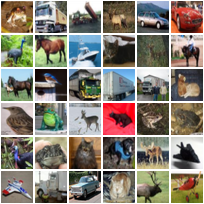

In [9]:
require 'image';
itorch.image(byte_x[{{1,36},{},{},{}}])

In [11]:
net.modules[2]

nn.ReLU
{
  inplace : false
  threshold : 0
  _type : torch.DoubleTensor
  output : DoubleTensor - size: 100x6x26x26
  gradInput : DoubleTensor - size: 100x6x26x26
  val : 0
}


In [23]:
inp = torch.DoubleTensor(3,32,32):fill(1)
f1 = net.modules[3]:forward(net.modules[2]:forward(net.modules[1]:forward(inp)))
itorch.image(f1)

In [24]:
f2 = net.modules[6]:forward(net.modules[5]:forward(net.modules[4]:forward(f1)))
itorch.image(f2)

In [26]:
f3 = net.modules[9]:forward(net.modules[8]:forward(net.modules[7]:forward(f2)))
print(f3)

 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 1.1986
 0.8952
 1.2730
 0.0000
 0.5609
 1.7873
 0.0000
 0.0000
 0.0000
 0.0000
 1.2267
 0.0000
 0.0000
 0.3608
 2.1851
 0.6160
 2.5201
 1.0583
 0.1832
 4.2536
 0.0000
 0.0000
 0.0000
 0.3289
 0.0000
 2.9104
 0.0000
 0.0000
 0.6485
 0.7599
 1.2912
 0.0000
 0.0000
 0.0000
 0.0000
 0.1534
 2.3070
 0.0000
 0.0000
 0.1191
 0.0000
 0.9865
 0.0000
 0.0000
 0.0000
 0.0000
 1.7270
 0.4657
 0.0000
 0.0000
 0.7862
 1.9754
 0.0000
 0.0000
 0.3698
 0.0000
 0.0000
 0.0000
 2.5750
[torch.DoubleTensor of size 64]



In [27]:
net.modules[10]:forward(f3)

 0.6070
-2.5930
 0.3713
 1.4162
 0.1781
 1.0967
-1.2160
-1.2096
 2.0912
-1.2915
[torch.DoubleTensor of size 10]

